In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import load_model
from PIL import Image
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from sklearn.model_selection import train_test_split

In [2]:
image_width =28
image_height =28

In [3]:
class train_control_Callback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('loss') < 0.3:
            print('\n 훈련을 중단합니다')
            self.model.stop_training = True
callbacks = train_control_Callback()        

In [4]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.ndim, train_labels.ndim, '\n')
print(train_images.shape, train_labels.shape, '\n')
print(test_images.shape, test_labels.shape, '\n')

11490434/11490434 [==============================] - 0s 0us/step
3 1 

(60000, 28, 28) (60000,) 

(10000, 28, 28) (10000,) 



In [5]:
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, stratify = train_labels, test_size = 0.2, random_state =25)
print(train_images.shape, val_images.shape)

(48000, 28, 28) (12000, 28, 28)


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  16 191 253 253 170 170 192 191 109  47   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  26 221 252 252 252 252 253 252 252 232 156  52
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 125 215 215 215 215 217 247 252 252 253 231
   78  37   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  93 128 25

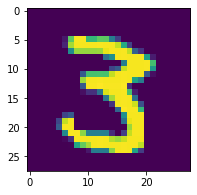

In [6]:
print(train_images[0])
print(train_labels[0])
plt.rcParams["figure.figsize"] =(3,3)
plt.imshow(train_images[0])
plt.show()

In [7]:
train_images, val_images = train_images/255, val_images/255
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes = 10)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes = 10)
val_labels = tf.keras.utils.to_categorical(val_labels, num_classes = 10)
print(train_labels.shape, val_labels.shape, test_labels.shape)

(48000, 10) (12000, 10) (10000, 10)


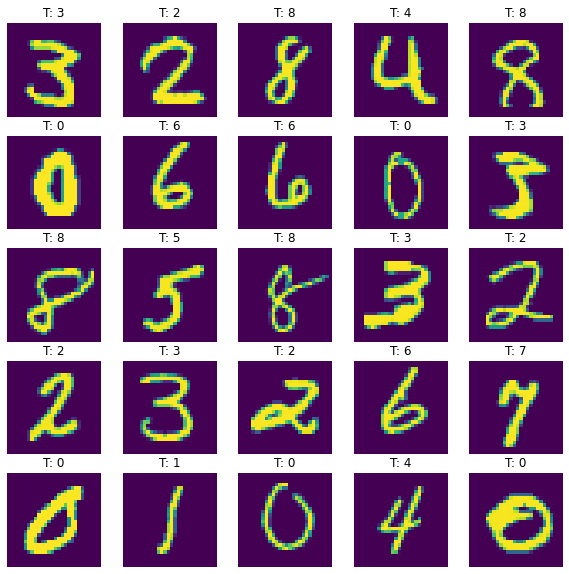

In [8]:
nrows = 5
ncols = 5
plt.rcParams["figure.figsize"] =(10,10)
f, axarr = plt.subplots(nrows, ncols)
for i in range(nrows*ncols):
    sub_plt = axarr[i//nrows, i%ncols]
    sub_plt.axis('off')
    sub_plt.imshow(train_images[i].reshape(image_width, image_height))
    sub_plt_title ='T: ' + str(np.argmax(train_labels[i]))
    sub_plt.set_title(sub_plt_title)
plt.show()  

In [9]:
model = Sequential()
model.add(Flatten(input_shape = (image_width, image_height)))
model.add(Dense(10, activation ='softmax'))
model.compile(loss="categorical_crossentropy", optimizer='SGD', metrics =['accuracy'])

fit_hist = model.fit(train_images, train_labels, epochs=200, validation_data = (val_images,val_labels), callbacks = [callbacks])
print(fit_hist.history.keys())

Epoch 1/200
1500/1500 [==============================] - 8s 5ms/step - loss: 0.8353 - accuracy: 0.8064 - val_loss: 0.5465 - val_accuracy: 0.8629
Epoch 2/200
1500/1500 [==============================] - 7s 4ms/step - loss: 0.4803 - accuracy: 0.8766 - val_loss: 0.4539 - val_accuracy: 0.8788
Epoch 3/200
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4204 - accuracy: 0.8882 - val_loss: 0.4155 - val_accuracy: 0.8867
Epoch 4/200
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3904 - accuracy: 0.8944 - val_loss: 0.3931 - val_accuracy: 0.8921
Epoch 5/200
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3718 - accuracy: 0.8981 - val_loss: 0.3781 - val_accuracy: 0.8953
Epoch 6/200
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3585 - accuracy: 0.9006 - val_loss: 0.3673 - val_accuracy: 0.8984
Epoch 7/200
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3485 - accuracy: 0.9033 - val_loss: 0.3592 - val_ac

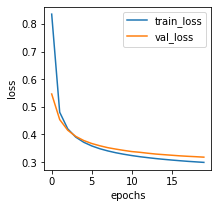

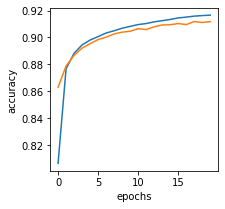

In [10]:
plt.rcParams["figure.figsize"] =(3,3)
plt.plot(fit_hist.history['loss'])
plt.plot(fit_hist.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss'])
plt.show()
plt.plot(fit_hist.history['accuracy'])
plt.plot(fit_hist.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

In [11]:
loss, accuracy = model.evaluate(test_images, test_labels, verbose=0)
print(accuracy)

0.9057000279426575


In [18]:
predict_images = model.predict(test_images)
plt.rcParams["figure.figsize"] =(3,3)
plt.imshow(test_images[0])
test_images.shape
plt.show()
print(test_labels[0])
print(predict_images[0])
print(np.argmax(predict_images[0]))

(10000, 28, 28)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


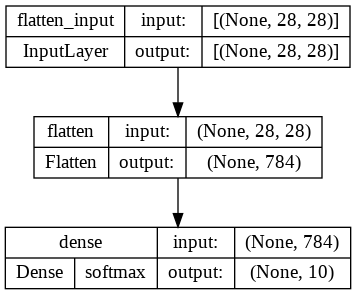

In [19]:
from keras.utils.vis_utils import plot_model
model.summary()
plot_model(model, show_shapes=True, show_layer_activations=True, show_layer_names = True)

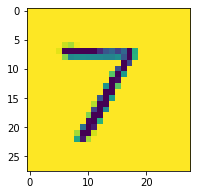

1/1 [==============================] - 0s 45ms/step
[[8.8127010e-04 5.0261050e-01 3.2497221e-01 6.2841035e-02 4.4942608e-05
  1.2739724e-02 1.1374791e-03 2.5383398e-02 6.2267344e-02 7.1220123e-03]]
1


In [47]:
model.save('ML_Softmax_Model.h5')
img = Image.open('/content/drive/MyDrive/test.png').convert("L")
plt.rcParams["figure.figsize"] =(3,3)
plt.imshow(img)
plt.show()
img =np.resize(img, (1, 784))
img = ((np.array(img)/255) - 1)* -1

model = load_model('ML_Softmax_Model.h5')
img =np.resize(img, (1, 28, 28)) 
predict_result = model.predict(img)
print(predict_result)
print(np.argmax(predict_result))

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
